Broken stick problem:

3d : Break a stick into six pieces. What is the probability that the six pieces can be formed into a tetrahedron?

Here is a LaTeX test:
$$\lim_{x \to \infty}\int_{0}^{x}\frac{\sin(x)}{x}$$

In [3]:
import random as r
import itertools
import math
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats

def breakStick(n):
  # Break a unit length stick into n pieces. Lengths are determined by the breaks.
  # Returns the unsorted lengths
  breaks = [0.0] + [r.random() for b in range(n-1)] + [1.0]
  breaks.sort()
  lengths = [breaks[i+1]-breaks[i] for i in range(n)]
  return lengths 

def isTriangle(lengths):
  # Given a list of three lengths, returns true if they can form a triangle.
  L = [lengths[0],lengths[1],lengths[2]]
  L.sort()
  return L[0] + L[1] > L[2]

def getFs(lengths):
  # Returns f_min and f_max
  a,b,c,d,e,f = lengths
  t1 = ( pow(e*e+b*b-c*c-d*d,2) )/(4*a*a)
  t2 = math.sqrt( d*d - pow((e*e-a*a-d*d)/(-2*a),2) )
  t3 = math.sqrt( b*b - pow((c*c-a*a-b*b)/(-2*a),2) )
  fmin = math.sqrt( t1+pow(t2-t3,2) )
  fmax = math.sqrt( t1+pow(t2+t3,2) )
  return fmin,fmax

def lengthProbability(a,b):
  # Given range of lengths from a to b, returns probability that a random stick 
  # has a length between a and b.  
  return pow(1-a,5) - pow(1-b,5)

def isOrderedTetrahedron(lengths):
  # Given a particular sequence of lengths [a,b,c,d,e,f], returns true if a 
  # tetrahedron can be constructed with triangles abc, ade, bdf, and cef
  a,b,c,d,e,f = lengths 
  if isTriangle([a,b,c]) and isTriangle([a,d,e]):
      f_min, f_max = getFs([a,b,c,d,e,f]) 
      if f > f_min and f < f_max:
        return True 
  return False 

def get30configurations(lengths):
  # Returns 30 configurations of lengths that would construct 30 unique 
  # tetrahedron when passed to isOrderedTetrahedron(configuration) 
  a,b,c,d,e,f = lengths 
  return [  [a, b, c, d, e, f],
            [a, b, c, d, f, e],
            [a, b, c, e, d, f],
            [a, b, c, e, f, d],
            [a, b, c, f, d, e],
            [a, b, c, f, e, d],
            [a, b, d, c, e, f],
            [a, b, d, c, f, e],
            [a, b, d, e, c, f],
            [a, b, d, e, f, c],
            [a, b, d, f, c, e],
            [a, b, d, f, e, c],
            [a, b, e, c, d, f],
            [a, b, e, c, f, d],
            [a, b, e, d, c, f],
            [a, b, e, d, f, c],
            [a, b, e, f, c, d],
            [a, b, e, f, d, c],
            [a, b, f, c, d, e],
            [a, b, f, c, e, d],
            [a, b, f, d, c, e],
            [a, b, f, d, e, c],
            [a, b, f, e, c, d],
            [a, b, f, e, d, c],
            [a, c, d, e, f, b],
            [a, c, d, f, e, b],
            [a, c, e, d, f, b],
            [a, c, e, f, d, b],
            [a, c, f, d, e, b],
            [a, c, f, e, d, b]   ]

def get23configurations(lengths):
  # Return the 23 "redundant" configurations
  # [  49,    1, 4940, 4707,    0,    0,    0,    0,  161,  146,    0,
  #     0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
  #     0,    0, 2228,    0,    0,    0,    0,    0]
  a,b,c,d,e,f = lengths 
  return [  #[a, b, c, d, e, f], 
            #[a, b, c, d, f, e],
            #[a, b, c, e, d, f],
            #[a, b, c, e, f, d],
            [a, b, c, f, d, e],
            [a, b, c, f, e, d],
            [a, b, d, c, e, f],
            [a, b, d, c, f, e],
            #[a, b, d, e, c, f],
            #[a, b, d, e, f, c],
            [a, b, d, f, c, e],
            [a, b, d, f, e, c],
            [a, b, e, c, d, f],
            [a, b, e, c, f, d],
            [a, b, e, d, c, f],
            [a, b, e, d, f, c],
            [a, b, e, f, c, d],
            [a, b, e, f, d, c],
            [a, b, f, c, d, e],
            [a, b, f, c, e, d],
            [a, b, f, d, c, e],
            [a, b, f, d, e, c],
            [a, b, f, e, c, d],
            [a, b, f, e, d, c],
            #[a, c, d, e, f, b],
            [a, c, d, f, e, b],
            [a, c, e, d, f, b],
            [a, c, e, f, d, b],
            [a, c, f, d, e, b],
            [a, c, f, e, d, b]   ]


def get7configurations(lengths):    
  # Return the 7 primary configurations
  # [  49,    1, 4940, 4707,    0,    0,    0,    0,  161,  146,    0,
  #     0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
  #     0,    0, 2228,    0,    0,    0,    0,    0]
  """
  The 7 primary configurations give faces of triangles
    abc-ade-bdf-cef
    abc-adf-bde-cef   # Only adf
    abc-ade-bef-cdf
    abc-aef-bde-cdf
    abd-ace-bef-cdf   # Only ace
    abd-aef-bec-cdf   # Only bec
    acd-aef-bce-bdf   # Only acd and only bce
  """
  a,b,c,d,e,f = lengths 
  return [  [a, b, c, d, e, f], 
            [a, b, c, d, f, e],
            [a, b, c, e, d, f],
            [a, b, c, e, f, d],
            #[a, b, c, f, d, e],
            #[a, b, c, f, e, d],
            #[a, b, d, c, e, f],
            #[a, b, d, c, f, e],
            [a, b, d, e, c, f],
            [a, b, d, e, f, c],
            #[a, b, d, f, c, e],
            #[a, b, d, f, e, c],
            #[a, b, e, c, d, f],
            #[a, b, e, c, f, d],
            #[a, b, e, d, c, f],
            #[a, b, e, d, f, c],
            #[a, b, e, f, c, d],
            #[a, b, e, f, d, c],
            #[a, b, f, c, d, e],
            #[a, b, f, c, e, d],
            #[a, b, f, d, c, e],
            #[a, b, f, d, e, c],
            #[a, b, f, e, c, d],
            #[a, b, f, e, d, c],
            [a, c, d, e, f, b] ]
            #[a, c, d, f, e, b],
            #[a, c, e, d, f, b],
            #[a, c, e, f, d, b],
            #[a, c, f, d, e, b],
            #[a, c, f, e, d, b]   ] 

In [4]:
# Analyze a stick broken into n pieces
def analyzePieces(n,iterations=100000):
  print( 'Breaking a stick into {:n} pieces...'.format(n) )
  N = iterations 
  all_lengths = []
  lengths_unsorted = []
  lengths_sorted = [] 
  for iteration in range(N):
    lengths = breakStick(n)

    for i in range(len(lengths)):   ### Round for binning
      lengths[i] = round(lengths[i],5)

    lengths_unsorted.append([l for l in lengths])
    lengths = sorted(lengths) 
    lengths_sorted.append(lengths) 
    for l in lengths:
      all_lengths.append(l) 
  # Distributions by ordered length 
  for i in range(n):
    print('min: ' + str(min(np.array(lengths_sorted)[:,i])))
    print('max: ' + str(max(np.array(lengths_sorted)[:,i])))
    print('mode: ' + str(stats.mode( np.array(lengths_sorted)[:,i] )))
    plt.figure(figsize=(16, 3))
    plt.hist( np.array(lengths_sorted)[:,i], 100,
              density=True,
              histtype='bar',
              facecolor='b',
              alpha=0.5 )
    plt.title( 'Sorted length distribution, piece '+str(i) ) 
    plt.xlim(0,1)
    plt.show() 
  # Total length distribution 
  plt.figure(figsize=(16, 3))
  plt.hist( np.array(all_lengths), 100,
            density=True,
            histtype='bar',
            facecolor='b',
            alpha=0.5 )
  plt.title( 'Length Distribution' ) 
  plt.xlim(0,1)
  plt.show() 
  return lengths_sorted 
  


Breaking a stick into 2 pieces...
min: 0.0
max: 0.5
mode: ModeResult(mode=array([0.15141]), count=array([10]))


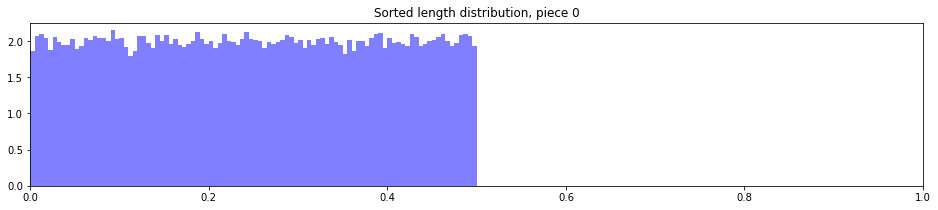

min: 0.5
max: 1.0
mode: ModeResult(mode=array([0.52067]), count=array([10]))


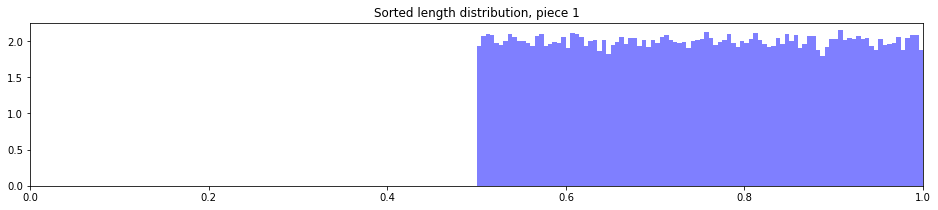

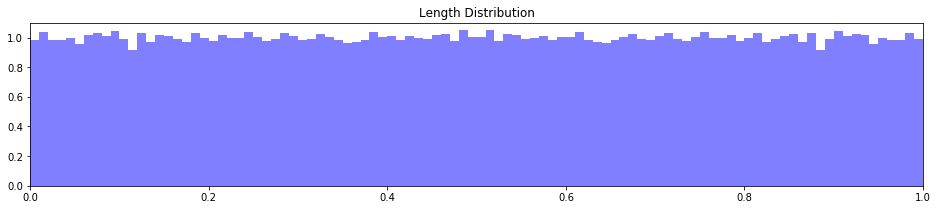

[[0.30031, 0.69969],
 [0.16076, 0.83924],
 [0.09603, 0.90397],
 [0.08553, 0.91447],
 [0.03491, 0.96509],
 [0.10061, 0.89939],
 [0.29403, 0.70597],
 [0.36814, 0.63186],
 [0.2843, 0.7157],
 [0.19581, 0.80419],
 [0.29661, 0.70339],
 [0.38472, 0.61528],
 [0.34212, 0.65788],
 [0.27602, 0.72398],
 [0.17166, 0.82834],
 [0.26833, 0.73167],
 [0.14502, 0.85498],
 [0.29839, 0.70161],
 [0.4015, 0.5985],
 [0.01627, 0.98373],
 [0.00718, 0.99282],
 [0.01585, 0.98415],
 [0.4739, 0.5261],
 [0.15459, 0.84541],
 [0.23065, 0.76935],
 [0.07672, 0.92328],
 [0.43288, 0.56712],
 [0.12779, 0.87221],
 [0.45787, 0.54213],
 [0.10554, 0.89446],
 [0.09273, 0.90727],
 [0.38824, 0.61176],
 [0.31455, 0.68545],
 [0.21178, 0.78822],
 [0.47711, 0.52289],
 [0.37045, 0.62955],
 [0.25305, 0.74695],
 [0.48136, 0.51864],
 [0.32993, 0.67007],
 [0.09519, 0.90481],
 [0.06264, 0.93736],
 [0.42276, 0.57724],
 [0.34605, 0.65395],
 [0.15006, 0.84994],
 [0.37066, 0.62934],
 [0.24063, 0.75937],
 [0.25063, 0.74937],
 [0.28584, 0.71416]

In [5]:
analyzePieces(2,100_000)

Breaking a stick into 6 pieces...
min: 0.0
max: 0.16112
mode: ModeResult(mode=array([0.00022]), count=array([3177]))


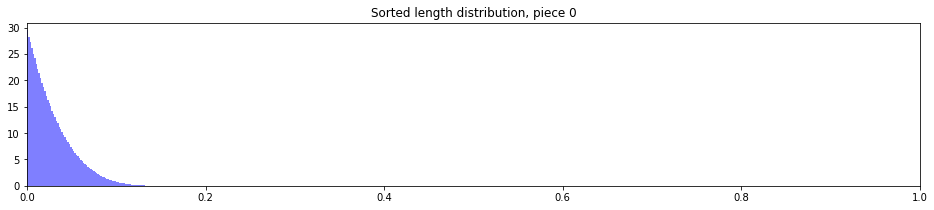

min: 2e-05
max: 0.19498
mode: ModeResult(mode=array([0.04645]), count=array([1251]))


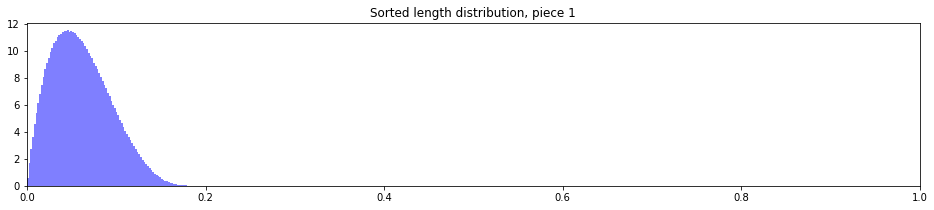

min: 0.00038
max: 0.24396
mode: ModeResult(mode=array([0.09619]), count=array([1028]))


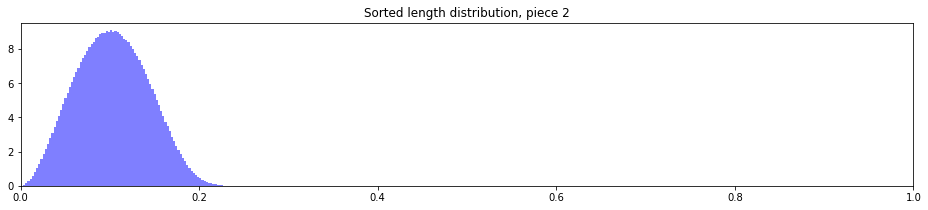

min: 0.00171
max: 0.32651
mode: ModeResult(mode=array([0.16162]), count=array([929]))


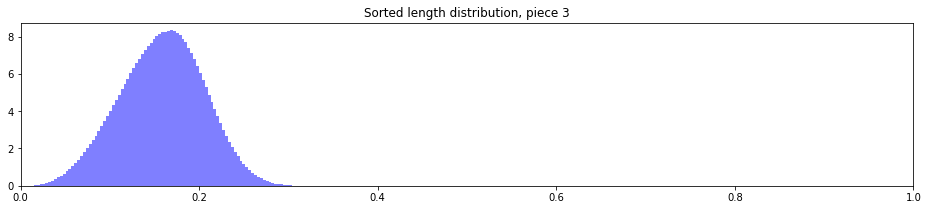

min: 0.00928
max: 0.48913
mode: ModeResult(mode=array([0.23809]), count=array([825]))


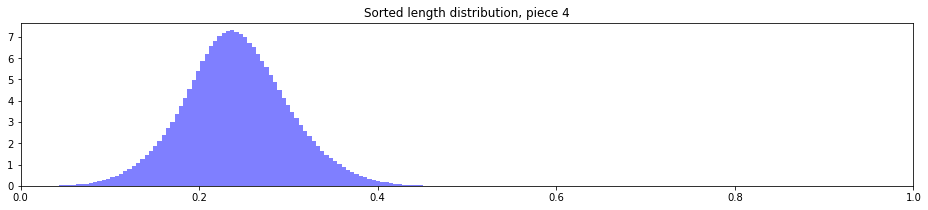

min: 0.17372
max: 0.97088
mode: ModeResult(mode=array([0.37162]), count=array([485]))


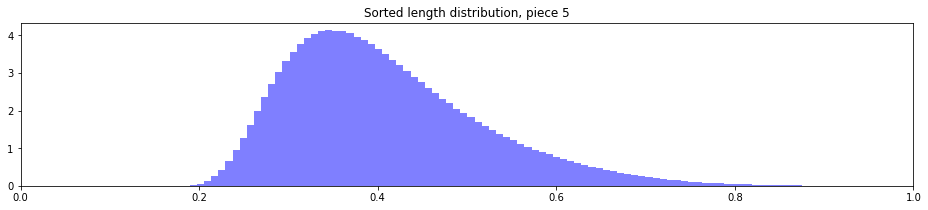

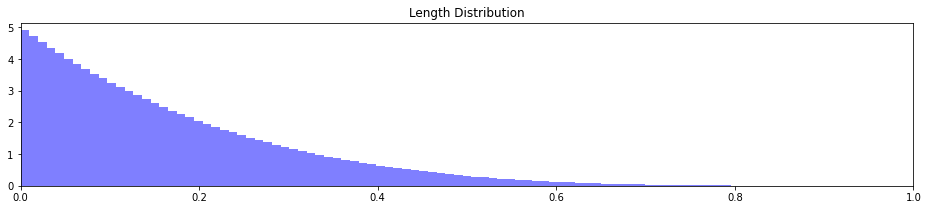

In [4]:
data = analyzePieces(6,10_000_000)

0.17372
0.17770580000000002
0.1816916
0.18567740000000002
0.1896632
0.19364900000000002
0.1976348
0.2016206
0.20560640000000002
0.2095922
0.21357800000000002
0.21756380000000003
0.2215496
0.22553540000000002
0.2295212
0.23350700000000002
0.2374928
0.24147860000000002
0.24546440000000003
0.2494502
0.253436
0.25742180000000003
0.2614076
0.2653934
0.26937920000000004
0.273365
0.2773508
0.28133660000000005
0.28532240000000003
0.2893082
0.29329400000000005
0.29727980000000004
0.3012656
0.30525140000000006
0.3092372
0.31322300000000003
0.3172088
0.3211946
0.32518040000000004
0.3291662
0.333152
0.33713780000000004
0.3411236
0.3451094
0.34909520000000005
0.35308100000000003
0.3570668
0.36105260000000006
0.3650384
0.3690242
0.37301000000000006
0.3769958
0.38098160000000003
0.3849674
0.3889532
0.39293900000000004
0.3969248
0.4009106
0.40489640000000005
0.40888220000000003
0.412868
0.41685380000000005
0.42083960000000004
0.4248254
0.42881120000000006
0.432797
0.4367828
0.44076860000000007
0.44475

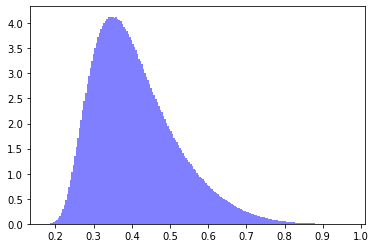

In [15]:

hist = plt.hist( np.array(data)[:,1], 200,   # Change the [:,0] index for stick a,b,c, etc. 
              density=True,
              histtype='bar',
              facecolor='b',
              alpha=0.5 )
x_data, y_data = hist[1], hist[0]
for i in range(0,len(x_data)):
  if x_data[i] < 1/6:
    print(x_data[i])
print('--- y ---')  
for i in range(0,len(y_data)):
  if x_data[i] < 1/6: 
    print(y_data[i])


In [40]:
# Print over an interval
x_data, y_data = hist[1], hist[0]
for i in range(0,len(x_data)):
  if x_data[i] < 1/4:
    print(x_data[i])
print('--- y ---')  
for i in range(0,len(y_data)):
  if x_data[i] < 1/4:
    print(y_data[i])

0.20581
0.2137145
0.221619
0.2295235
0.237428
0.2453325
--- y ---
0.00265671452969827
0.014675185021190444
0.04410146119299144
0.09698273135555685
0.17708899993674468
0.2988171294832065


In [ ]:
N = 1000000
tetra_count = 0
for iteration in range(N):
  for configuration in get7configurations( sorted(breakStick(6)) ):
    if isOrderedTetrahedron(configuration):
      tetra_count += 1
      break
print(tetra_count/N)
  

0.065473


Breaking a stick into 5 pieces...
min: 0.0
max: 0.19508
mode: ModeResult(mode=array([0.00045]), count=array([1051]))


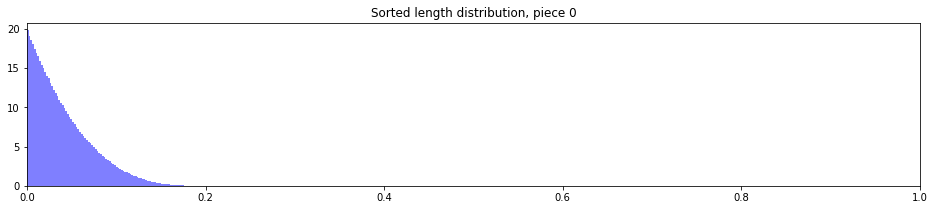

min: 3e-05
max: 0.24678
mode: ModeResult(mode=array([0.08325]), count=array([461]))


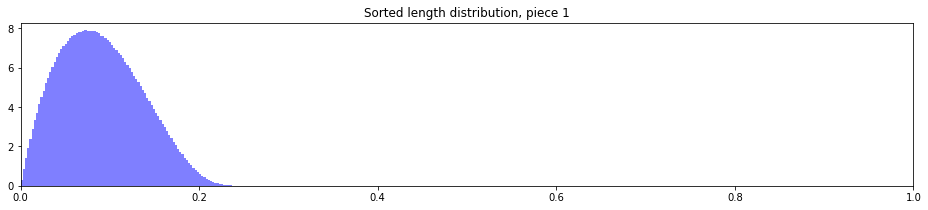

min: 0.00091
max: 0.32974
mode: ModeResult(mode=array([0.16615]), count=array([392]))


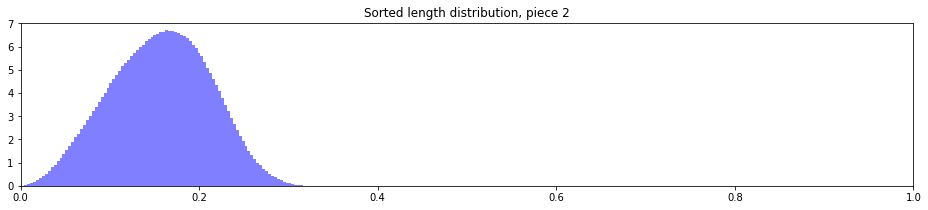

min: 0.00179
max: 0.49572
mode: ModeResult(mode=array([0.25876]), count=array([368]))


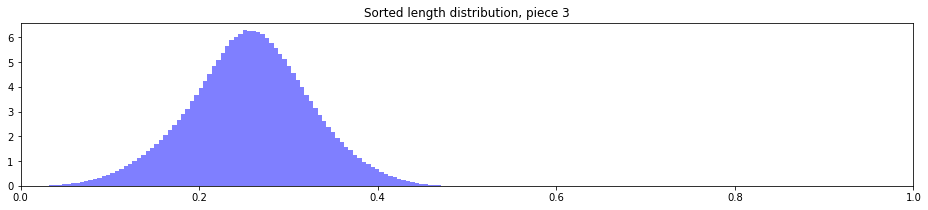

min: 0.20581
max: 0.99626
mode: ModeResult(mode=array([0.39998]), count=array([231]))


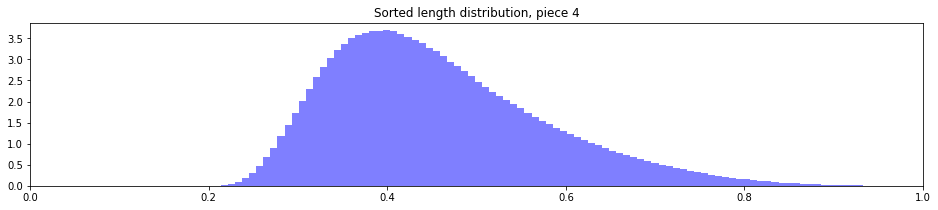

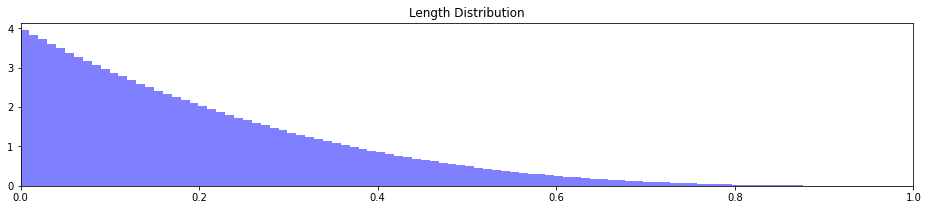

In [25]:
############################################33
# Five pieces
data = analyzePieces(5,5_000_000)

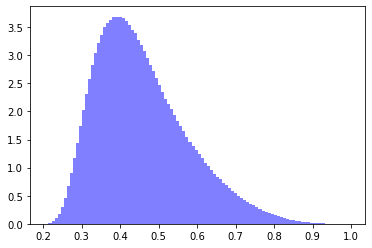

In [52]:
hist = plt.hist( np.array(data)[:,4], 100,   # Change the [:,0] index for stick a,b,c, etc. 
              density=True,
              histtype='bar',
              facecolor='b',
              alpha=0.5 )

In [55]:
# Print over an interval
x_data, y_data = hist[1], hist[0]
for i in range(0,len(x_data)):
  if x_data[i] > 1/2:
    print(x_data[i])
print('--- y ---')  
for i in range(0,len(y_data)):
  if x_data[i] > 1/2:
    print(y_data[i])

0.506181
0.5140855000000001
0.5219900000000001
0.5298945
0.5377990000000001
0.5457035000000001
0.5536080000000001
0.5615125000000001
0.5694170000000001
0.5773215
0.585226
0.5931305
0.6010350000000001
0.6089395000000001
0.6168440000000002
0.6247485000000002
0.6326530000000001
0.6405575000000001
0.6484620000000001
0.6563665000000001
0.6642710000000001
0.6721755
0.68008
0.6879845000000001
0.6958890000000001
0.7037935000000002
0.7116980000000002
0.7196025000000001
0.7275070000000001
0.7354115000000001
0.7433160000000001
0.7512205000000001
0.759125
0.7670295
0.7749340000000002
0.7828385000000002
0.7907430000000002
0.7986475000000002
0.8065520000000002
0.8144565000000001
0.8223610000000001
0.8302655000000001
0.8381700000000001
0.8460745000000001
0.853979
0.8618835000000002
0.8697880000000002
0.8776925000000002
0.8855970000000002
0.8935015000000002
0.9014060000000002
0.9093105000000001
0.9172150000000001
0.9251195000000001
0.9330240000000001
0.9409285000000001
0.9488330000000003
0.95673750000

In [1]:
################################################################################
# Analysis of six pieces, particularly looking for the polynomial representations 
# of their probability density functions. 

Breaking a stick into 6 pieces...
min: 0.0
max: 0.16022
mode: ModeResult(mode=array([0.00021]), count=array([3133]))


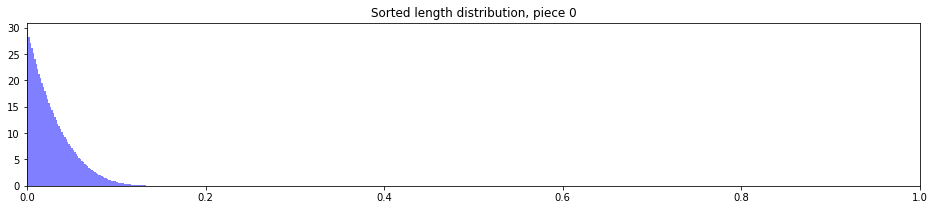

min: 1e-05
max: 0.19434
mode: ModeResult(mode=array([0.04873]), count=array([1271]))


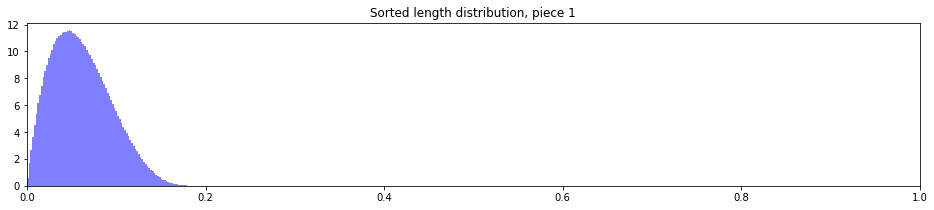

min: 0.00042
max: 0.24491
mode: ModeResult(mode=array([0.10385]), count=array([1004]))


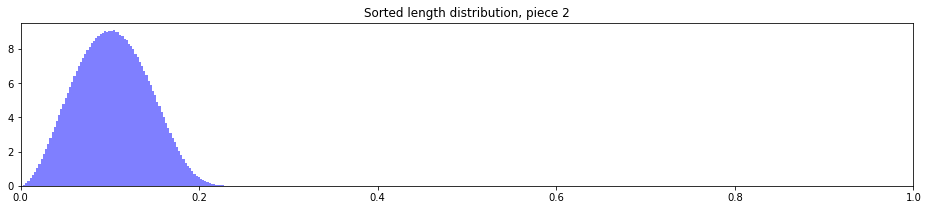

min: 0.00323
max: 0.32714
mode: ModeResult(mode=array([0.17072]), count=array([923]))


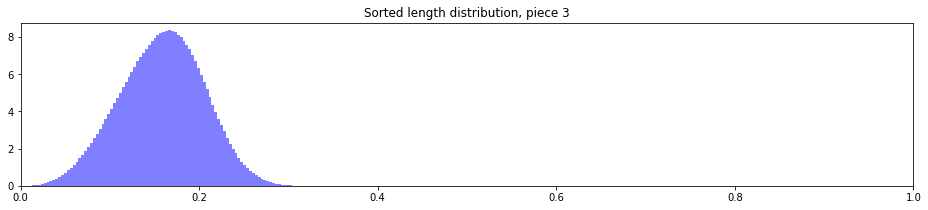

min: 0.01042
max: 0.4888
mode: ModeResult(mode=array([0.2348]), count=array([826]))


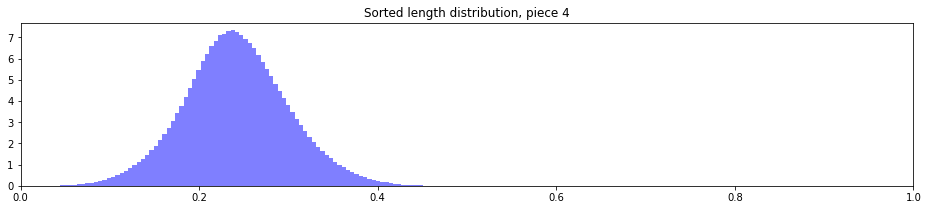

min: 0.17454
max: 0.9746
mode: ModeResult(mode=array([0.34293]), count=array([479]))


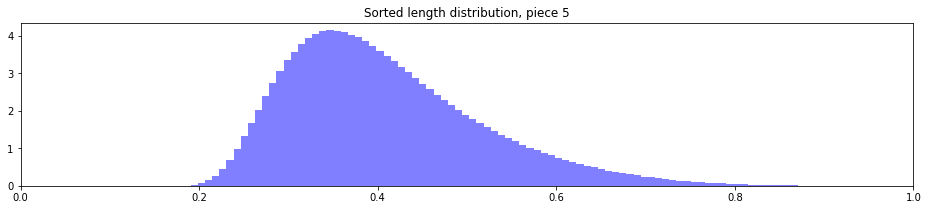

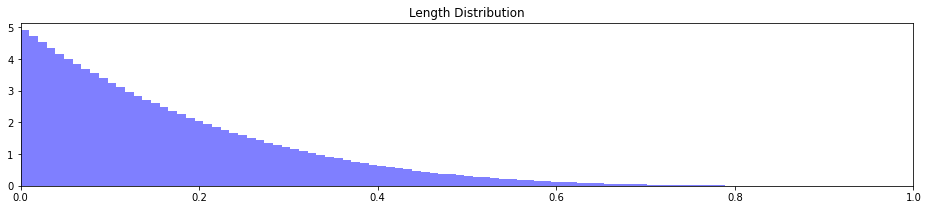

In [5]:
data = analyzePieces(6,10_000_000)

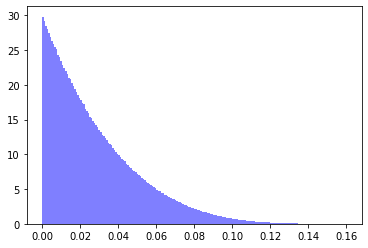

In [6]:
########################## Piece a
hist = plt.hist( np.array(data)[:,0], 200,  
              density=True,
              histtype='bar',
              facecolor='b',
              alpha=0.5 )
hist_x, y_data = hist[1], hist[0]
x_data = []
for i in range(1,len(hist_x)):
  x_data.append((hist_x[i-1]+hist_x[i])/2.0)

In [7]:
poly_a1 = np.polyfit(x_data,y_data,4)
print(poly_a1)

[ 3.91858555e+04 -2.60082484e+04  6.48687322e+03 -7.20048803e+02
  2.99956472e+01]


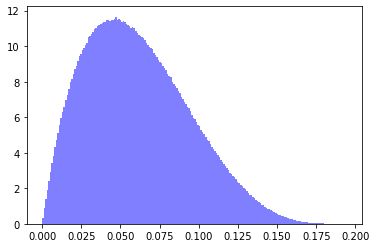

In [8]:
########################## Piece b
# [0, 1/6] U [1/6, 1/5]
hist = plt.hist( np.array(data)[:,1], 200,  
              density=True,
              histtype='bar',
              facecolor='b',
              alpha=0.5 )
hist_x, y_data = hist[1], hist[0]
x_data = []
for i in range(1,len(hist_x)):
  x_data.append((hist_x[i-1]+hist_x[i])/2.0)

In [9]:
x1 = [x for x in x_data if x < 1/6]
y1 = [y_data[i] for i in range(len(x1))]

x2 = [x for x in x_data if x > 1/6]
y2 = [y_data[len(x1)+i] for i in range(len(x2))]

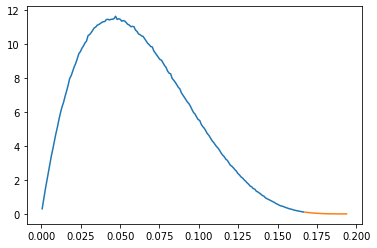

In [10]:
plt.plot(x1,y1)
plt.plot(x2,y2)

In [11]:
poly_b1 = np.polyfit(x1,y1,4)
print(poly_b1)

poly_b2 = np.polyfit(x2,y2,4)
print(poly_b2) 

[-9.99693424e+04  5.43780562e+04 -9.87766624e+03  5.99332438e+02
  5.04779811e-04]
[102315.85229991 -81474.75424746  24335.1325356   -3231.13527883
    160.9145347 ]


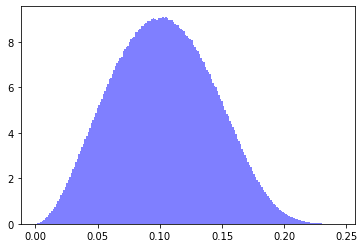

In [12]:
########################## Piece c
# [0, 1/6] U [1/6, 1/5] U [1/5, 1/4]
hist = plt.hist( np.array(data)[:,2], 200,  
              density=True,
              histtype='bar',
              facecolor='b',
              alpha=0.5 )
hist_x, y_data = hist[1], hist[0]
x_data = []
for i in range(1,len(hist_x)):
  x_data.append((hist_x[i-1]+hist_x[i])/2.0)

In [13]:
x1 = [x for x in x_data if x < 1/6]
y1 = [y_data[i] for i in range(len(x1))]

x2 = [x for x in x_data if x > 1/6 and x < 1/5]
y2 = [y_data[len(x1)+i] for i in range(len(x2))]

x3 = [x for x in x_data if x > 1/5]
y3 = [y_data[len(x1)+len(x2)+i] for i in range(len(x3))]

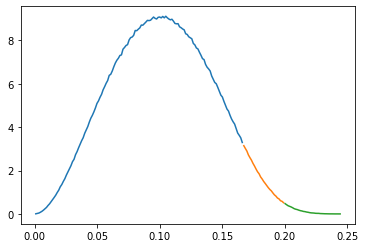

In [14]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

In [15]:
poly_c1 = np.polyfit(x1,y1,4)
print(poly_c1)

poly_c2 = np.polyfit(x2,y2,4)
print(poly_c2) 

poly_c3 = np.polyfit(x3,y3,4)
print(poly_c3) 

[ 9.14793273e+04 -3.62918732e+04  3.63037719e+03 -1.07206925e+00
  9.74903100e-03]
[-850031.43141369  629638.43457753 -173348.67307905   20939.99122417
    -930.63719641]
[ 75044.95731832 -75285.54547979  28312.47622789  -4730.64402352
    296.32310971]


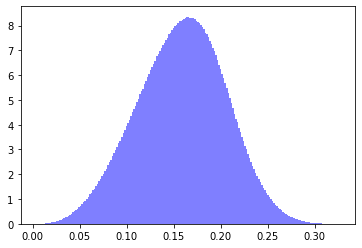

In [16]:
########################## Piece d
# [0, 1/6] U [1/6, 1/5] U [1/5, 1/4] U [1/4, 1/3]
hist = plt.hist( np.array(data)[:,3], 200,  
              density=True,
              histtype='bar',
              facecolor='b',
              alpha=0.5 )
hist_x, y_data = hist[1], hist[0]
x_data = []
for i in range(1,len(hist_x)):
  x_data.append((hist_x[i-1]+hist_x[i])/2.0)

[-3.24637446e+04  7.22230033e+03 -1.90555359e+00  2.38260454e-02
  5.34642325e-04]
[-1440348.50177464  1050833.54217679  -288957.79214504    35431.86600686
    -1623.98208232]
[-256562.82107732  242369.86192652  -84796.9857365    12929.47575833
    -716.22982595]
[ 25052.35982896 -33151.71171047  16471.71636102  -3641.45440824
    302.18437781]


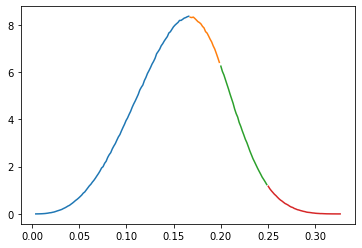

In [17]:
x1 = [x for x in x_data if x < 1/6]
y1 = [y_data[i] for i in range(len(x1))]

x2 = [x for x in x_data if x > 1/6 and x < 1/5]
y2 = [y_data[len(x1)+i] for i in range(len(x2))]

x3 = [x for x in x_data if x > 1/5 and x < 1/4]
y3 = [y_data[len(x1)+len(x2)+i] for i in range(len(x3))]

x4 = [x for x in x_data if x > 1/4]
y4 = [y_data[len(x1)+len(x2)+len(x3)+i] for i in range(len(x4))]

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)

poly_d1 = np.polyfit(x1,y1,4)
print(poly_d1)

poly_d2 = np.polyfit(x2,y2,4)
print(poly_d2) 

poly_d3 = np.polyfit(x3,y3,4)
print(poly_d3) 

poly_d4 = np.polyfit(x4,y4,4)
print(poly_d4)

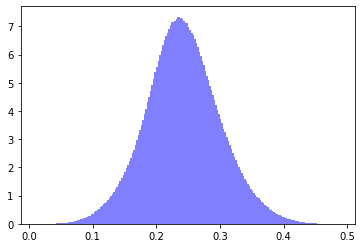

In [18]:
########################## Piece e
# [0, 1/6] U [1/6, 1/5] U [1/5, 1/4] U [1/4, 1/3] U [1/3, 1/2]
hist = plt.hist( np.array(data)[:,4], 200,  
              density=True,
              histtype='bar',
              facecolor='b',
              alpha=0.5 )
hist_x, y_data = hist[1], hist[0]
x_data = []
for i in range(1,len(hist_x)):
  x_data.append((hist_x[i-1]+hist_x[i])/2.0)

[ 3.46303228e+03  3.35326847e+01 -2.14295222e+00  3.48082423e-02
 -2.82306367e-05]
[ 493794.19224    -360491.28850513   99034.92721823  -12051.14491699
     548.26633592]
[ 289136.21057897 -264865.58692925   89420.46667678  -13153.20327363
     715.64837871]
[-67042.15942344  84245.58034466 -39350.07636993   8035.18040403
   -596.85809956]
[ 2551.8251505  -5064.715429    3772.42137783 -1249.70849689
   155.35001623]


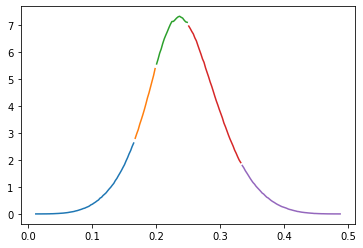

In [19]:
x1 = [x for x in x_data if x < 1/6]
y1 = [y_data[i] for i in range(len(x1))]

x2 = [x for x in x_data if x > 1/6 and x < 1/5]
y2 = [y_data[len(x1)+i] for i in range(len(x2))]

x3 = [x for x in x_data if x > 1/5 and x < 1/4]
y3 = [y_data[len(x1)+len(x2)+i] for i in range(len(x3))]

x4 = [x for x in x_data if x > 1/4 and x < 1/3]
y4 = [y_data[len(x1)+len(x2)+len(x3)+i] for i in range(len(x4))]

x5 = [x for x in x_data if x > 1/3]
y5 = [y_data[len(x1)+len(x2)+len(x3)+len(x4)+i] for i in range(len(x5))]

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)

poly_e1 = np.polyfit(x1,y1,4)
print(poly_e1)

poly_e2 = np.polyfit(x2,y2,4)
print(poly_e2) 

poly_e3 = np.polyfit(x3,y3,4)
print(poly_e3) 

poly_e4 = np.polyfit(x4,y4,4)
print(poly_e4)

poly_e5 = np.polyfit(x5,y5,4)
print(poly_e5)

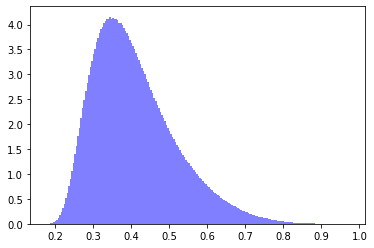

In [20]:
########################## Piece f
# [0, 1/6] U [1/6, 1/5] U [1/5, 1/4] U [1/4, 1/3] U [1/3, 1/2] U [1/2, 1]
hist = plt.hist( np.array(data)[:,5], 200,  
              density=True,
              histtype='bar',
              facecolor='b',
              alpha=0.5 )
hist_x, y_data = hist[1], hist[0]
x_data = []
for i in range(1,len(hist_x)):
  x_data.append((hist_x[i-1]+hist_x[i])/2.0)

[-296926.39628227  222112.50403015  -62178.71167472    7721.9347225
    -359.01559171]
[-51216.67871363  45372.88195798 -14631.56357547   2051.96650457
   -106.11656491]
[ 30477.91970366 -37446.21073533  16911.67979851  -3296.62114815
    234.50320778]
[-2074.85086559  4162.80273519 -3082.68739087   982.98418354
  -109.61933073]
[  30.17545336 -120.50934014  180.53823637 -120.24372556   30.03955774]


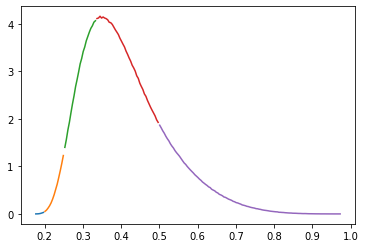

In [25]:
# x1 = [x for x in x_data if x < 1/6]
# y1 = [y_data[i] for i in range(len(x1))]
x1 = [] 
y1 = []

x2 = [x for x in x_data if x < 1/5]
y2 = [y_data[len(x1)+i] for i in range(len(x2))]

x3 = [x for x in x_data if x > 1/5 and x < 1/4]
y3 = [y_data[len(x1)+len(x2)+i] for i in range(len(x3))]

x4 = [x for x in x_data if x > 1/4 and x < 1/3]
y4 = [y_data[len(x1)+len(x2)+len(x3)+i] for i in range(len(x4))]

x5 = [x for x in x_data if x > 1/3 and x < 1/2]
y5 = [y_data[len(x1)+len(x2)+len(x3)+len(x4)+i] for i in range(len(x5))]

x6 = [x for x in x_data if x > 1/2]
y6 = [y_data[len(x1)+len(x2)+len(x3)+len(x4)+len(x5)+i] for i in range(len(x6))]

#plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)
plt.plot(x6,y6)

#poly_f1 = np.polyfit(x1,y1,4)
#print(poly_f1)

poly_f2 = np.polyfit(x2,y2,4)
print(poly_f2) 

poly_f3 = np.polyfit(x3,y3,4)
print(poly_f3) 

poly_f4 = np.polyfit(x4,y4,4)
print(poly_f4)

poly_f5 = np.polyfit(x5,y5,4)
print(poly_f5)

poly_f6 = np.polyfit(x6,y6,4)
print(poly_f6)

In [79]:
###########################################################


Breaking a stick into 4 pieces...
min: 0.0
max: 0.2485
mode: ModeResult(mode=array([0.00313]), count=array([150]))


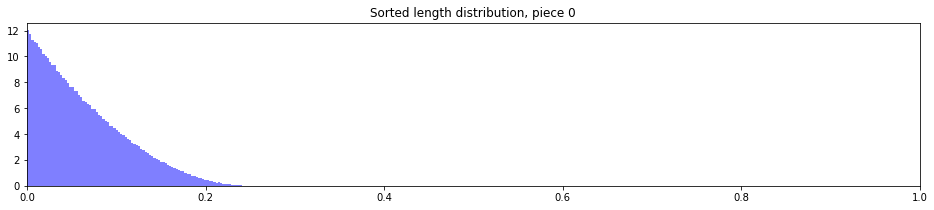

min: 0.00021
max: 0.33226
mode: ModeResult(mode=array([0.12598]), count=array([80]))


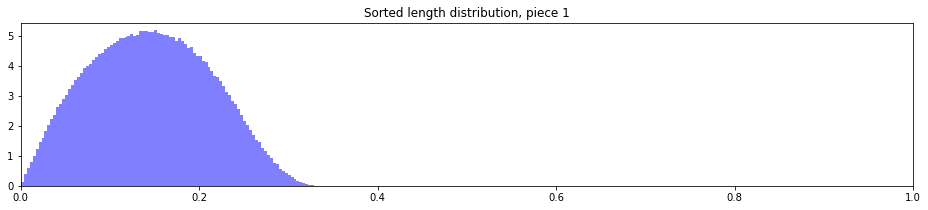

min: 0.00214
max: 0.49674
mode: ModeResult(mode=array([0.27574]), count=array([78]))


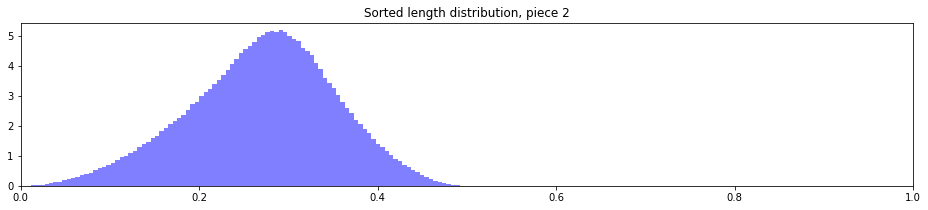

min: 0.25204
max: 0.99521
mode: ModeResult(mode=array([0.41889]), count=array([53]))


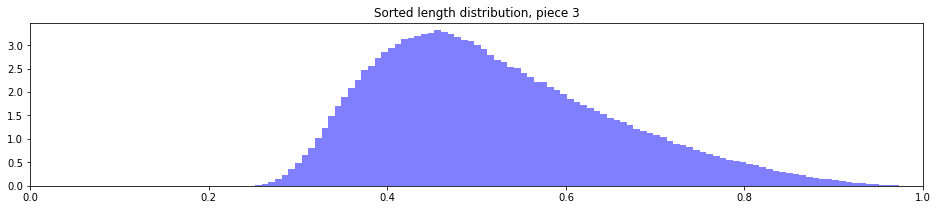

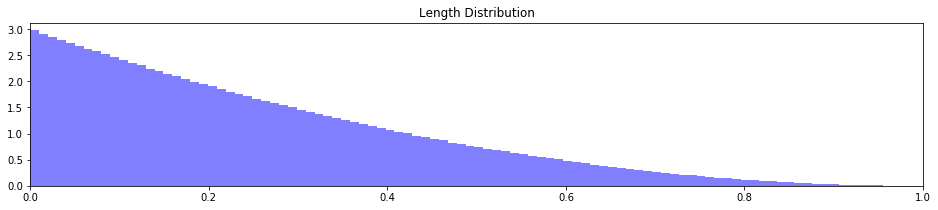

In [6]:
################################################################################
# Analysis of four pieces, particularly looking for the polynomial representations 
# of their probability density functions. 
data = analyzePieces(4,1_000_000)

Breaking a stick into 4 pieces...
min: 0.0
max: 0.24938
mode: ModeResult(mode=array([0.00048]), count=array([6234]))


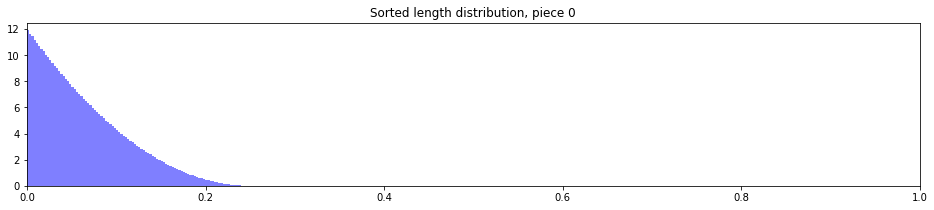

min: 1e-05
max: 0.33302
mode: ModeResult(mode=array([0.1432]), count=array([2749]))


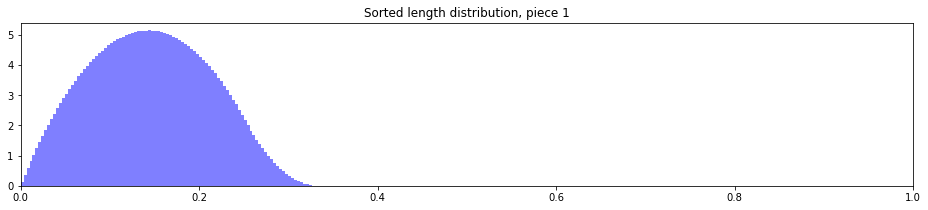

min: 0.00151
max: 0.49938
mode: ModeResult(mode=array([0.28918]), count=array([2739]))


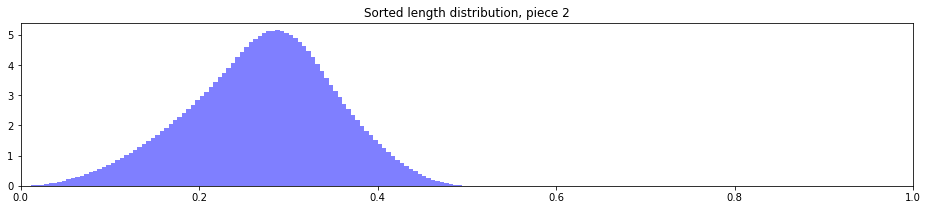

min: 0.25075
max: 0.99708
mode: ModeResult(mode=array([0.45315]), count=array([1780]))


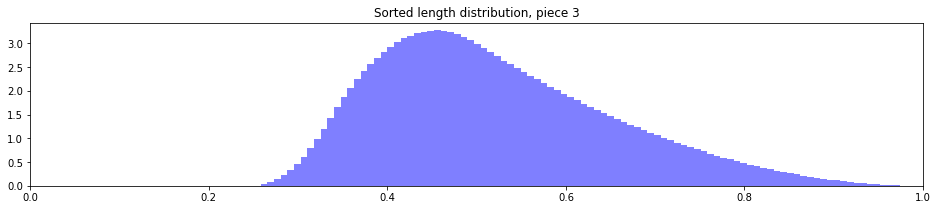

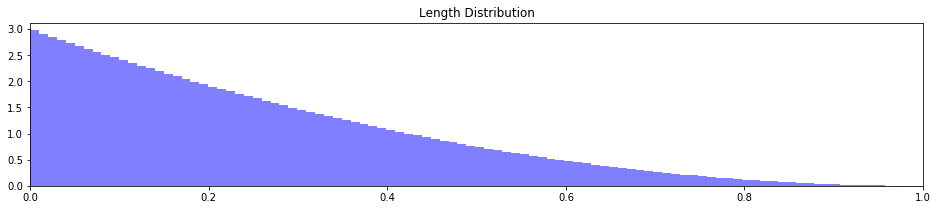

In [31]:
##############################################################################
# Analyze n pieces 
num_pieces = 4 
data = analyzePieces( num_pieces, 50_000_000 );


[ 0 ] ( 0.0 ,  0.25 )
[192.03565952 -96.011481    12.00071728]
[ 1 ] ( 0.0 ,  0.25 )
[-2.52061021e+02  7.20103107e+01 -3.64166407e-05]
[ 1 ] ( 0.25 ,  0.3333333333333333 )
[ 325.62210274 -216.96448146   36.14232735]
[ 2 ] ( 0.0 ,  0.25 )
[ 7.21403567e+01 -3.27504713e-02  1.07432217e-03]
[ 2 ] ( 0.25 ,  0.3333333333333333 )
[-501.21039657  286.41079642  -35.77539023]
[ 2 ] ( 0.3333333333333333 ,  0.5 )
[ 143.96335874 -143.96726047   35.99297384]
[ 3 ] ( 0.25 ,  0.3333333333333333 )
[192.09134803 -96.05661475  12.0087934 ]
[ 3 ] ( 0.3333333333333333 ,  0.5 )
[-131.73365812  119.79110331  -23.9596101 ]
[ 3 ] ( 0.5 ,  1.0 )
[ 11.99770256 -23.99559946  11.99794902]


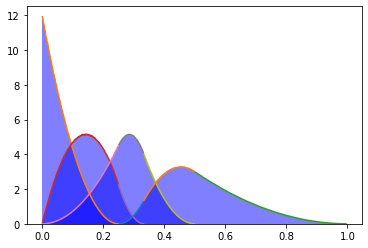

In [32]:
for piece_index in range(num_pieces):
  hist = plt.hist( np.array(data)[:,piece_index], 200,  
                density=True,
                histtype='bar',
                facecolor='b',
                alpha=0.5 );   # Supress histograms 
  hist_x, y_data = hist[1], hist[0]
  x_data = []
  for i in range(1,len(hist_x)):
    x_data.append((hist_x[i-1]+hist_x[i])/2.0)

  # Split into intervals   
  intervals = [[0.0,1.0/num_pieces]] 
  if piece_index == num_pieces - 1:
    intervals = [] 
  for i in range(piece_index): 
    intervals.append([1.0/(num_pieces-i),1.0/(num_pieces-i-1)])

  for [x1,x2] in intervals:
    # Get the x and y data on the interval 
    x_temp = [] 
    y_temp = [] 
    for i in range(len(x_data)):
      if x1<x_data[i] and x_data[i] < x2:
        x_temp.append(x_data[i])
        y_temp.append(y_data[i]) 
  
    plt.plot(x_temp, y_temp) 
    poly = np.polyfit(x_temp,y_temp,num_pieces-2)
    print('[',piece_index,']', '(',x1,', ',x2,')')
    print(poly) 